# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


In [8]:
#print('Customer_Table',Customer_Table.shape)
#print('Policy_Table',Policy_Table.shape)
#print('Fund_Table',Fund_Table.shape)

If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [9]:
sqlite_query = """

SELECT [Product Name] , round(avg([Policy Value]),2) [Average Policy Value]
from Policy_Table
group by [Product Name] 

"""

pd.read_sql(sqlite_query, conn)

,Product Name,Average Policy Value
0,CORPORATE MEMBERSHIP,5697.29
1,FOCUSSED ISA,5746.34
2,NHS PENSION,5241.50
3,PRU BOND,4516.39
4,PRUDENTIAL INVESTMENT PLAN,5084.52
5,PRUDENTIAL ISA,5161.14
6,RETIREMENT ACCOUNT,504964.96
7,SIPP,5335.84
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [10]:

sqlite_query = """
select count(*) 'Cust Opened New Policy in Q1 2017'
from Policy_Table PT 
inner join Policy_Table EX
on PT.[Customer ID] =EX.[Customer ID] and PT.[Policy Start Date] between '2017-01-01 00:00:00'  and '2017-03-31 00:00:00' 
and EX.[Policy Start Date]<'2016-12-31 00:00:00' and EX.[Product Category]='PENSION'
"""
#Assumption: We will be using the data till 31-Dec-2016 and consider those customers as existing onces while fetching the list of new customers in Q1 2017
pd.read_sql(sqlite_query, conn).reset_index()

,index,Cust Opened New Policy in Q1 2017
0,0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [11]:
# this solution is effective if the Policy_Value_Snapshot is continuiously incremental or decremental for moving months. 
# We are considering difference as positive diffences only from first and last policy month


sqlite_query = """
select [Customer ID]  from 
(
    select  [Customer ID],[Policy Number], max(Policy_Value_Snapshot)- min(Policy_Value_Snapshot) difference
    from Fund_Table
    
    group by [Customer ID],[Policy Number]

)
group by [Customer ID]
order by sum(difference) desc
limit 1
"""

print(pd.read_sql(sqlite_query, conn).reset_index())

   index Customer ID
0      0    CO517259


In [12]:
# this solution is effective if the Policy_Value_Snapshot is incremental or decremental for moving months by not continuiously. i.e a given month in between can have minimum or maximum value 
# We are considering difference as positive and negative diffence from first and last policy month
#If a customer has more than 1 policy the difference will be added

#Below SQL will result us only the customer ID but if we want to see other details then we can add [Policy Number] in select part and then in group by part. this way we will get to know the customer policy with biggest difference
#If want to see the amount then select statement should look like select  [Customer ID], sum(Max_Value)-sum(Min_Value) Value_Difference from

sqlite_query = """
select  [Customer ID] , sum(Max_Value)-sum(Min_Value) Value_Difference from
(
    select [Policy Number], [Customer ID], 

    (case when [Date]=MIN([Date]) OVER(PARTITION BY [Policy Number],[Customer ID]) then [Policy_Value_Snapshot] else 0 end) Min_Value,
    (case when [Date]=MAX([Date]) OVER(PARTITION BY [Policy Number],[Customer ID]) then [Policy_Value_Snapshot] else 0 end) MAX_Value
    from Fund_Table
)
as t

group by [Customer ID]
order by sum(Max_Value)-sum(Min_Value) desc
Limit 1
"""

print(pd.read_sql(sqlite_query, conn).reset_index())

print ('Observation: Customer CO401070 has 2 policies ISA1895 (-19,680.05), RET100479(943,283.50) therefore diffence is 923603.44')

   index Customer ID  Value_Difference
0      0    CO401070     923603.448052
Observation: Customer CO401070 has 2 policies ISA1895 (-19,680.05), RET100479(943,283.50) therefore diffence is 923603.44


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [13]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [14]:
import re
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
def check(email):
    if(re.match(regex, email)):
        return("Valid Email")
    else:
        return("Invalid Email")

Customer_Table['Status']= Customer_Table.apply(lambda x: check(x["Email"]) if x["Email"]!=None else "Not an email", axis =1 )


dataframe = pd.DataFrame(Customer_Table, columns = ['Customer ID', 'Email', 'Status'])
dataframe[dataframe['Status']!='Valid Email'].reset_index()

,index,Customer ID,Email,Status
0,1,CO314757,None,Not an email
1,2,CO720602,None,Not an email
2,3,CO34804,None,Not an email
3,4,CO474411,None,Not an email
4,5,CO777973,None,Not an email
5,6,CO311505,None,Not an email
6,7,CO474987,None,Not an email
7,8,CO496581,None,Not an email
8,9,CO862381,None,Not an email
9,22,CO401070,None,Not an email


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [15]:
def age_buckets(x): 
    if x <= 18: return '0-18' 
    elif x < 41: return '19-40' 
    elif x < 60: return '41-59' 
    elif x < 80: return '60-79' 
    elif x >= 80: return '80+' 
    else: return 'other'

In [16]:
analysis_table = Policy_Table.merge(Customer_Table, how = 'left', on = 'Customer ID')

analysis_table['Age Range'] = analysis_table.Age.apply(age_buckets)
analysis_table.head()

,index_x,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date,index_y,Email,Gender,Age,Postcode,Status,Age Range
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00,33,None,Female,87,None,Not an email,80+
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00,741,DGOWANLOCKPU@EBAY.CO.UK,Male,55,MD-3300,Valid Email,41-59
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00,774,CBROWNILLIX@UMN.EDU,Female,53,55330-000,Valid Email,41-59
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00,453,CCUTCHEYCE@SALON.COM,Male,65,None,Valid Email,60-79
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00,951,SOFEARGUISEAT@CHICAGOTRIBUNE.COM,Female,40,None,Valid Email,19-40


<AxesSubplot:xlabel='Gender', ylabel='Policy_Value'>

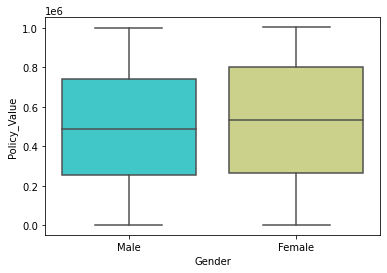

In [17]:
import seaborn as sns

sum_assured_gender = analysis_table.groupby(['Customer ID', 'Gender']).aggregate(Policy_Value = ('Policy Value', sum)).reset_index() 
#sum_assured_gender.head()
sns.boxplot(x='Gender',y='Policy_Value',data=sum_assured_gender, palette='rainbow')


<AxesSubplot:xlabel='Age', ylabel='Policy_Value'>

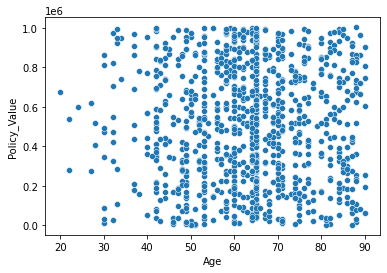

In [18]:
#analysis_table
sum_assured_age = analysis_table.groupby(['Customer ID', 'Age']).aggregate(Policy_Value = ('Policy Value', sum)).reset_index() 
sns.scatterplot(data=sum_assured_age, x="Age", y="Policy_Value")
#total_sum_assured_age

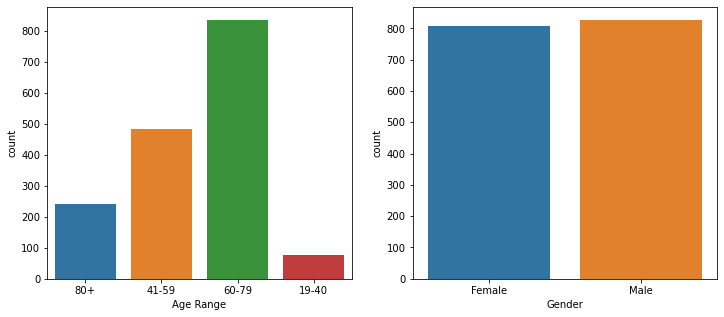

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(x="Age Range", data=analysis_table)
plt.subplot(122)
ax = sns.countplot(x="Gender", data=analysis_table)

  Age Range  Policy_Value
0     19-40    26106822.0
1     41-59   143315556.0
2     60-79   261897274.0
3       80+    75858365.0


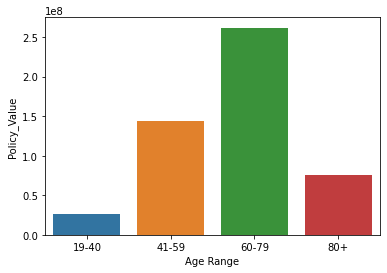

In [20]:
analysis_table
sum_assured_age_range = analysis_table.groupby(['Age Range']).aggregate(Policy_Value = ('Policy Value', sum)).reset_index() 
print(sum_assured_age_range)
sns.barplot(x = 'Age Range', y = 'Policy_Value',  data = sum_assured_age_range)
plt.show()

<AxesSubplot:xlabel='Age Range', ylabel='Sum_Assured'>

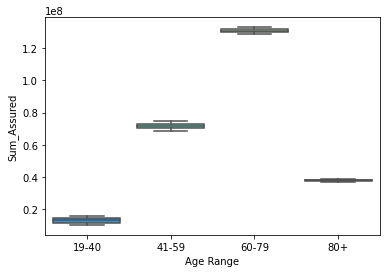

In [21]:
# Insert your answer below: 
total_sum_assured = analysis_table.groupby(['Age Range', 'Gender']).aggregate(Sum_Assured = ('Policy Value', sum)).reset_index()
total_sum_assured.head()
sns.boxplot(x='Age Range',y='Sum_Assured',data=total_sum_assured, palette='rainbow')